# Projet Python 2025

# Etape 5 : Interprétation et visualisation

## Affichage des 5 dernières alertes

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("alertes_enrichies.csv")
df


,Titre Alerte,Type,Description,Lien,Date,CVE ID,Description CVE,CWE,Nature de la faille,Score CVSS,Gravité CVSS,Score EPSS,Gravité EPSS,Éditeur,Produit,Versions Affectées
0,Multiples vulnérabilités dans MISP (08 décembr...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mon, 08 Dec 2025 00:00:00 +0000",CVE-2025-67906,"In MISP before 2.5.28, app/View/Elements/Workf...",CWE-79,CWE-79 Improper Neutralization of Input During...,5.4,Moyenne,0.00035,Faible,MISP,MISP,0
1,Vulnérabilité dans les produits Mitel (11 déce...,Avis,Une vulnérabilité a été découverte dans les pr...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-67823,NaN,Non disponible,Non disponible,NaN,Non disponible,NaN,Non disponible,MISP,MISP,0
2,Multiples vulnérabilités dans Roundcube (15 dé...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mon, 15 Dec 2025 00:00:00 +0000",CVE-2025-68460,Roundcube Webmail before 1.5.12 and 1.6 before...,CWE-116,CWE-116 Improper Encoding or Escaping of Output,7.2,Élevée,0.00048,Faible,Roundcube,Webmail,"0, 1.6.0"
3,Multiples vulnérabilités dans les produits VMw...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2023-45288,An attacker may cause an HTTP/2 endpoint to re...,Non disponible,CWE-400: Uncontrolled Resource Consumption,NaN,Non disponible,0.66635,Élevée,golang.org/x/net,golang.org/x/net/http2,0
4,Multiples vulnérabilités dans les produits Fox...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-57779,NaN,Non disponible,Non disponible,NaN,Non disponible,NaN,Non disponible,golang.org/x/net,golang.org/x/net/http2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,[MàJ] Multiples vulnérabilités dans Microsoft ...,Alerte,**[Mise à jour du 23 juillet 2025]** Le 20 jui...,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,"Mon, 21 Jul 2025 00:00:00 +0000",CVE-2025-53770,Deserialization of untrusted data in on-premis...,CWE-502,CWE-502: Deserialization of Untrusted Data,9.8,Critique,0.89607,Critique,Microsoft,Microsoft SharePoint Server Subscription Edition,16.0.0
76,Incidents de sécurité dans les pare-feux Sonic...,Alerte,"[Mise à jour du 7 août 2025] Le 6 août 2025, S...",https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,"Tue, 05 Aug 2025 00:00:00 +0000",CVE-2024-40766,An improper access control vulnerability has b...,CWE-284,CWE-284 Improper Access Control,NaN,Non disponible,0.04021,Faible,SonicWall,SonicOS,"5.9.2.14-12o and older versions, 6.5.4.14-109n..."
77,Vulnérabilité dans Citrix NetScaler ADC et Net...,Alerte,"Le 26 août 2025, Citrix a publié un bulletin d...",https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,"Tue, 26 Aug 2025 00:00:00 +0000",CVE-2025-7775,Memory overflow vulnerability leading to Remot...,CWE-119,CWE-119 Improper Restriction of Operations wit...,NaN,Non disponible,0.18005,Faible,NetScaler,Gateway,"14.1, 13.1, 13.1 FIPS and NDcPP, 12.1 FIPS and..."
78,[MàJ] Multiples vulnérabilités dans Cisco ASA ...,Alerte,**[Mise à jour du 07 novembre 2025]** Le 5 nov...,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,"Thu, 25 Sep 2025 00:00:00 +0000",CVE-2025-20362,"Update: On November 5, 2025, Cisco became awar...",CWE-862,Missing Authorization,6.5,Moyenne,0.42189,Moyenne,Cisco,Cisco Secure Firewall Threat Defense (FTD) Sof...,"6.2.3, 6.2.3.1, 6.2.3.2, 6.2.3.3, 6.2.3.4, 6.2..."


## Lien entre score CVSS et score EPSS

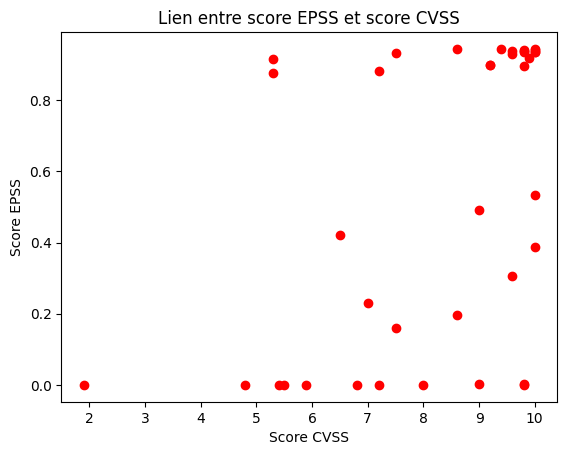

In [7]:
plt.plot(df.get("Score CVSS"), df.get("Score EPSS"), "ro")
plt.title("Lien entre score EPSS et score CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.show()

Ce graphique en nuage de points montre la corrélation entre les deux scores de sévérité.

CVSS = potentiel technique d'exploitabilité
EPSS = probabilité réelle d'exploitation
Si les points sont dispersés, cela signifie que certaines vulnérabilités techniquement graves ne sont pas forcément exploitées en pratique (bon signe de sécurité).

## Nombre d'alertes par produit

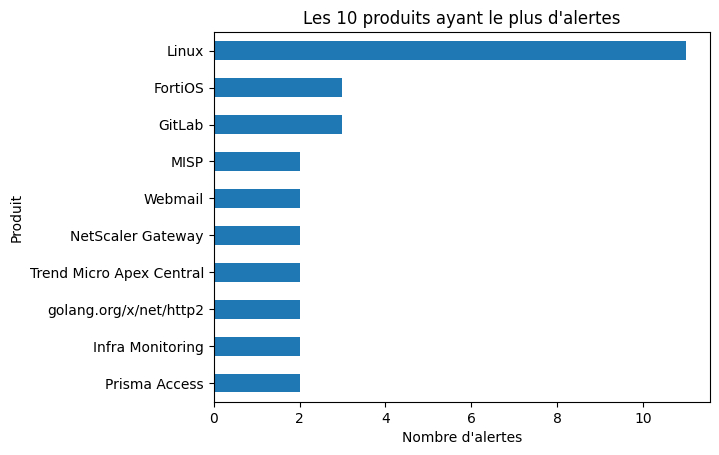

In [8]:
alertes_produit = df["Produit"].value_counts().nlargest(10)
alertes_produit.plot(kind="barh")
plt.title("Les 10 produits ayant le plus d'alertes")
plt.xlabel("Nombre d'alertes")
plt.gca().invert_yaxis()
plt.show()

Ce diagramme en barres horizontales classe les produits les plus affectés par les vulnérabilités. Les produits en haut ont le plus d'alertes de sécurité, ce qui devrait être votre priorité pour les correctifs.

## Diagramme circulaire des types de vulnérabilités + détails dans un tableau

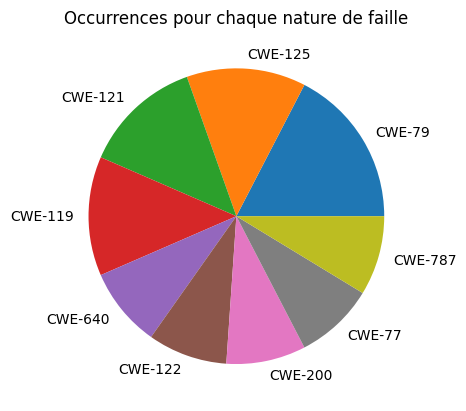

,count
Nature de la faille,
Execute unauthorized code or commands,6
CWE-119 Improper Restriction of Operations within the Bounds of a Memory Buffer,3
CWE-77 Improper Neutralization of Special Elements used in a Command ('Command Injection'),2
CWE-640: Weak Password Recovery Mechanism for Forgotten Password,2
CWE-79 Improper Neutralization of Input During Web Page Generation (XSS or 'Cross-site Scripting'),2
CWE-284 Improper Access Control,2
CWE-1385: Missing Origin Validation in WebSockets,1
CWE-61: UNIX Symbolic Link (Symlink) Following,1
CWE-489: Active Debug Code,1


In [9]:

nb_cwe = df["CWE"].value_counts().nlargest(10)
nb_cwe = nb_cwe.drop(labels=["Non disponible"])
nb_cwe.plot(kind="pie")
plt.xlabel("")
plt.ylabel("")
plt.title("Occurrences pour chaque nature de faille")
plt.show()

nb_nature_faille = df["Nature de la faille"].value_counts()
nb_nature_faille = nb_nature_faille.drop(labels=["Non disponible"])

df_nature_faille = pd.DataFrame(nb_nature_faille)
df_nature_faille

Le diagramme circulaire montre la répartition des types de failles détectées (injection SQL, XSS, authentification faible...).
La parts les plus grandes représentent les catégories de vulnérabilités les plus fréquentes
Le tableau qui suit détaille le nombre exact d'occurrences par type de faille


## Editeurs ayant le score EPSS le plus élevé

In [10]:
epss_editeur = df.nlargest(10, "Score EPSS")[["Éditeur", "Score EPSS"]]
epss_editeur

,Éditeur,Score EPSS
46,Ivanti,0.94482
49,Citrix,0.94348
58,checkpoint,0.94342
51,Ivanti,0.94319
56,Palo Alto Networks,0.94297
65,Palo Alto Networks,0.94223
48,Cisco,0.94069
45,Citrix,0.93993
44,NaN,0.93918
64,Fortinet,0.93846


Ce tableau affiche les 10 vulnérabilités avec les plus hauts risques d'exploitation réelle. L'éditeur associé montre qui doit être contacté en priorité pour les correctifs critiques.